# K means
Este es el notebook del algoritmo de K means para tareas de clustering.
Usted debe implementar el algoritmo en una clase llamada `KMeans2` con una interfaz similar a la clase `KMeans` de scikit-learn

## Importación de módulos y librerías

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from kmeans2 import KMeans2

## Generación del Dataset

(300, 2)


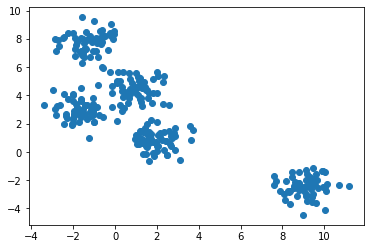

In [90]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.70, random_state=0)
print(X.shape)
plt.scatter(X[:,0], X[:,1])

## Implementación del Algoritmo
Implemente el algoritmo KMeans en la siguiente clase, complete el código con las siguientes características:

### Clase KMeans2
La clase KMeans2 debe recibir en el constructor 2 parámetros:
  - k: el número de clusters
  - max_iter: número máximo de iteraciones del algoritmo

#### Método fit
El método `fit` recibe un parámetro, `X` y realiza el entrenamiento del algoritmo. El mismo debe seguir los pasos:

  1. Inicialización de centroides $\mu_1, \mu_2$.
  2. Asignación de clusters $C^{(i)} = argmin(distancia(\mu_i, x^{(i)}))$
  3. Actualización de centroides: $\mu_i = \frac{1}{|C^{(i)}|}\sum_{x^{(i)} \in C^{(i)}} X^{(i)}$
  4. Repetir desde el paso 2.

Una vez se termine el entrenamiento, se debe almacenar los centroides en una lista en la instancia de la clase.


#### Atributo inertia_
Este método deberá implementar la función de costo para evaluar el rendimiento del número de clusters k. Deberá implementar esta métrica usando la siguiente fórmula que representa la distancia de todos los puntos en cada clusters:

$$ costo = \sum_{j=1}^{K} \sum_{i=1}^{n} dist(\mu_j, x_i)$$

In [119]:
wcss = []
ki = 1
kf = 9
for i in range(ki, kf):
    ui = X[np.random.choice(np.arange(len(X)), i), :]
    for i in range(100):
            center = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in ui]) for x_i in X])
            ui = [X[center == k].mean(axis = 0) for k in range(i)]
            cluster_centers_ = center
            inertia_ = np.array([[(x_i-y_k) for y_k in ui]for x_i in X])
    #kmeans = KMeans2(i,400)
    #kmeans.fit(X)
    #wcss.append(kmeans.inertia_)
    wcss.append(inertia_)
plt.plot(range(ki, kf), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



[array([-1.32037839,  7.4302707 ]), array([2.71123112, 1.36393004])]
[array([-1.06702642,  5.99082711]), array([3.62157377, 0.6519588 ])]
[array([-0.7187016 ,  5.11305019]), array([ 5.33600942, -0.63581934])]
[array([-0.55104779,  4.85094767]), array([ 5.92711082, -1.01929601])]
[array([-0.43237563,  4.61632759]), array([ 6.47574476, -1.25449671])]
[array([-0.27551039,  4.3736669 ]), array([ 7.22373039, -1.60898279])]
[array([-0.07202381,  4.07975232]), array([ 8.54752548, -2.19855374])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98425554]), array([ 9.09724701, -2.44439722])]
[array([0.00603454, 3.98

In [87]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans2 = KMeans2(5, 400)
kmeans.fit(X)
kmeans2.fit(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()

AttributeError: 'KMeans2' object has no attribute 'cluster_centers_'

In [19]:
import time
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=400, random_state=0)
kmeans3 = KMeans3(5, 400)
start = time.time()
kmeans.fit(X)
print(f'sklearn: {time.time() - start}')
start = time.time()
kmeans3.fit(X)
print(f'albert: {time.time() - start}')

sklearn: 0.03956174850463867
jose: 0.26125264167785645
